## Loan Prediction DataSet

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [102]:
df=pd.read_csv('C:\\Users\\kalya\\Downloads\\ML project\\Loan.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,...,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,...,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,...,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,...,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,...,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,...,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,...,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,...,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,...,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,...,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [103]:
df.shape

(148670, 34)

## Data Description

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [105]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,...,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,...,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,...,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,...,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,...,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,...,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [106]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [107]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [108]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [109]:
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [110]:
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [111]:
df

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,0,29.0


In [112]:
df.describe()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1
count,1.486700e+05,112231.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,335.136582,4.978935e+05,6957.338876,699.789103,0.246445,37.732932
std,1.839093e+05,0.561391,58.409084,3.599353e+05,6496.586382,115.875857,0.430942,10.545435
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000,5.000000
25%,1.965000e+05,3.625000,360.000000,2.680000e+05,3720.000000,599.000000,0.000000,31.000000
50%,2.965000e+05,3.990000,360.000000,4.180000e+05,5760.000000,699.000000,0.000000,39.000000
75%,4.365000e+05,4.375000,360.000000,6.280000e+05,8520.000000,800.000000,0.000000,45.000000
max,3.576500e+06,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000,61.000000


In [113]:
df.duplicated().sum()

6

In [114]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [115]:
df.shape

(148664, 10)

In [116]:
df.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


## EDA

In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [120]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

In [121]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [122]:
df['loan_type'].max()

'type3'

In [123]:
df['loan_type'].min()

'type1'

In [124]:
df['loan_amount'].max()

3576500

In [125]:
df['loan_amount'].min()

16500

In [126]:
df['age'].value_counts()

age
45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: count, dtype: int64

In [127]:
df['rate_of_interest'].max()

8.0

In [128]:
df['rate_of_interest'].min()     #!!!

0.0

In [129]:
df['rate_of_interest'].mean()

4.045481969579513

In [130]:
df['status'].value_counts()

status
0    112027
1     36637
Name: count, dtype: int64

In [131]:
df['property_value'].value_counts()

property_value
4.979002e+05    15096
3.080000e+05     2791
2.580000e+05     2763
3.580000e+05     2679
4.080000e+05     2537
                ...  
4.648000e+06        1
3.878000e+06        1
5.758000e+06        1
2.618000e+06        1
2.698000e+06        1
Name: count, Length: 386, dtype: int64

In [132]:
df['property_value'].max()

16508000.0

In [133]:
df['property_value'].min()

8000.0

In [134]:
df['loan_amount'].max()

3576500

In [135]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [136]:
mask = df['income']==df['income'].max()
df[mask]['status']

62237    1
Name: status, dtype: int64

In [137]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [138]:
mask = df['income']==df['income'].min()           #!!!
df[mask]['status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: status, Length: 1259, dtype: int64

In [139]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

rate_of_interest
4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: count, dtype: int64

In [140]:
df['income'].value_counts()

income
6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: count, Length: 1002, dtype: int64

In [141]:
df['income'].mean()

6957.392164451898

In [142]:
mask=df['income']<2000

In [143]:
mask.value_counts()            # there is income less than 2000

income
False    140706
True       7958
Name: count, dtype: int64

In [144]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [145]:
mask=df['income']<2000
mask.value_counts()

income
False    148664
Name: count, dtype: int64

In [146]:
df['income'].min()

6957.392164451898

In [147]:
df['rate_of_interest'].value_counts()

rate_of_interest
4.045482    36437
3.990000    14454
3.625000     8799
3.875000     8592
3.750000     8473
            ...  
4.700000        1
8.000000        1
7.750000        1
5.300000        1
2.700000        1
Name: count, Length: 132, dtype: int64

In [148]:
df['rate_of_interest'].min()      # interest rate shall not be zero

0.0

In [149]:
df['rate_of_interest'].mean()

4.045481969579513

In [150]:
mask=df['rate_of_interest']==0
mask.value_counts()

rate_of_interest
False    148663
True          1
Name: count, dtype: int64

In [151]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [152]:
df['rate_of_interest'].min()

2.125

## Data Visualization

<Axes: xlabel='loan_type', ylabel='count'>

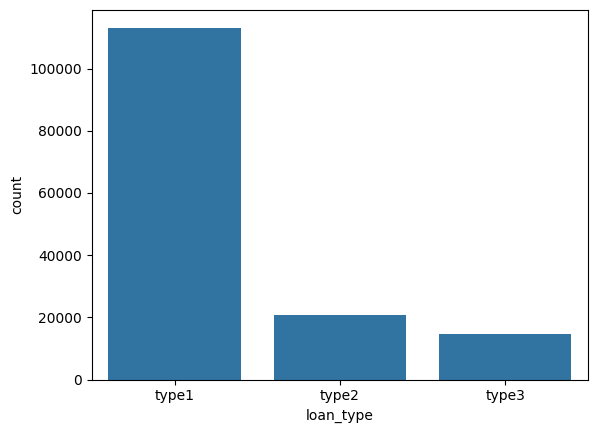

In [153]:
sns.countplot(data=df , x='loan_type')

<Axes: xlabel='status', ylabel='count'>

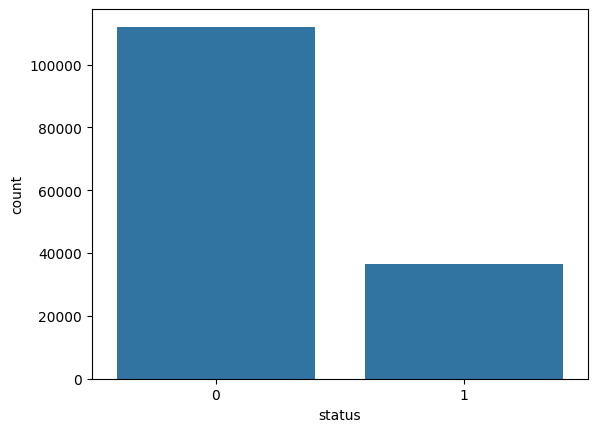

In [154]:
sns.countplot(data=df , x='status')

<Axes: xlabel='age', ylabel='count'>

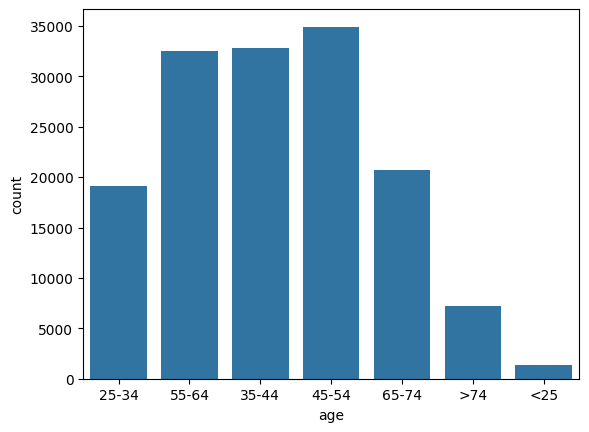

In [155]:
sns.countplot(data=df , x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

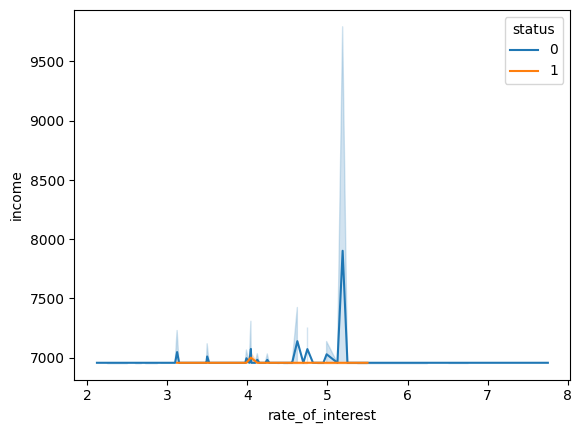

In [156]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

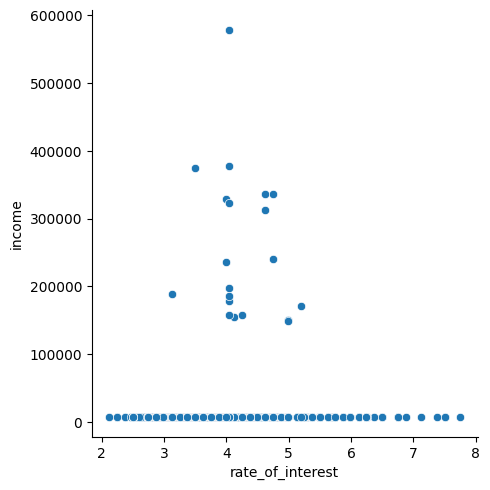

In [157]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

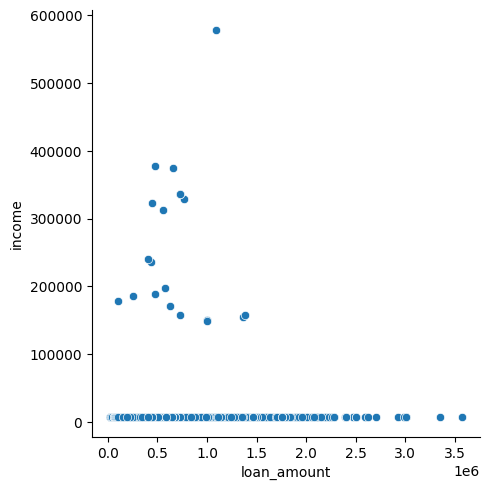

In [158]:
sns.relplot(x ="loan_amount", y ="income",data = df)

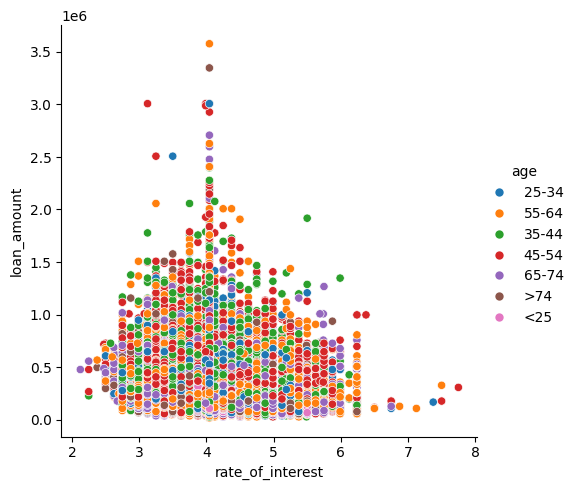

In [159]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

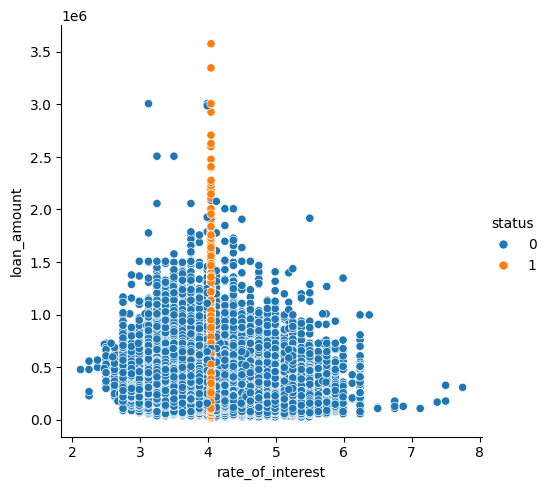

In [160]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

C:\Users\kalya\AppData\Local\Temp\ipykernel_3736\258400812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

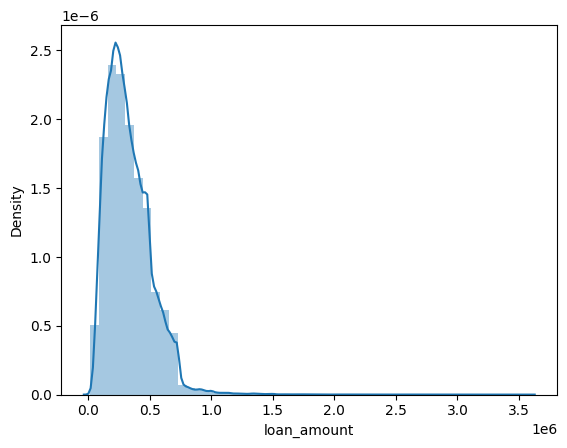

In [161]:
sns.distplot(df['loan_amount'])

In [162]:
sns.pairplot(df)

<Axes: xlabel='status', ylabel='loan_amount'>

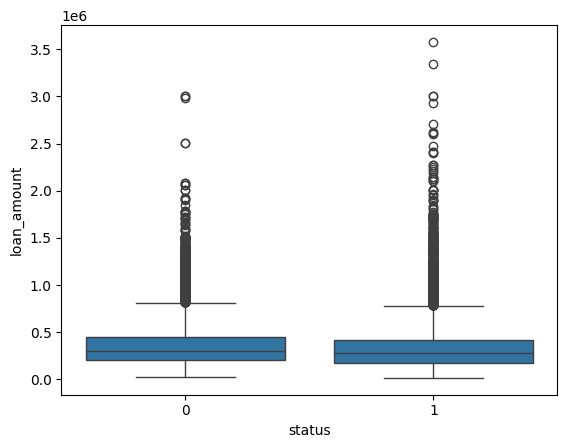

In [ ]:
sns.boxplot(data=df , x='status' , y ='loan_amount')

<Axes: xlabel='status', ylabel='term'>

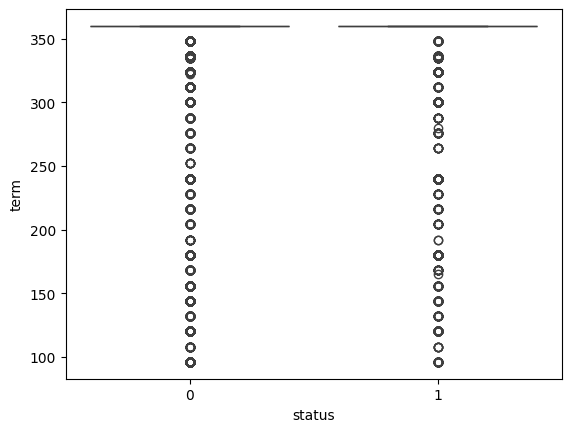

In [ ]:
sns.boxplot(data=df , x='status' , y ='term')

<Axes: xlabel='status', ylabel='income'>

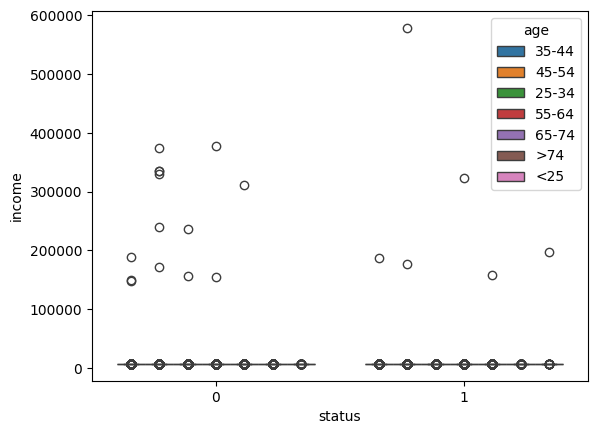

In [ ]:
sns.boxplot(data=df , x='status' , y ='income' , hue='age')

<Axes: xlabel='age', ylabel='credit_score'>

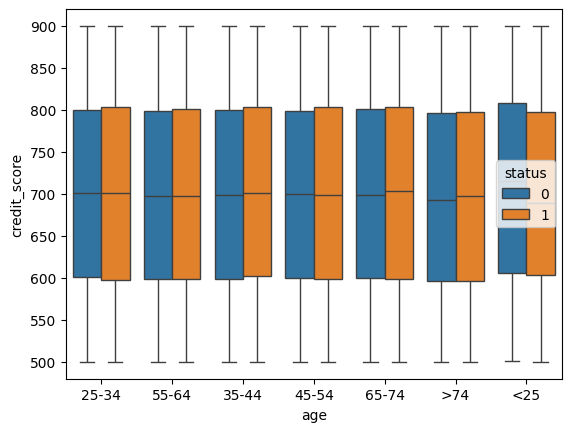

In [ ]:
sns.boxplot(data=df , x='age' , y ='credit_score' , hue='status')

## All data must be numerical to be used in the machine learning model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


In [ ]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148664 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type2   148664 non-null  bool   
 9   loan_type_type3   148664 non-null  bool   
 10  age_35-44         148664 non-null  bool   
 11  age_45-54         148664 non-null  bool   
 12  age_55-64         148664 non-null  bool   
 13  age_65-74         148664 non-null  bool   
 14  age_<25           148664 non-null  bool   
 15  age_>74           148664 non-null  bool   
dtypes: bool(8), float64(5), i

In [ ]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,False,False,False,False,False,False,False,False
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,True,False,False,False,True,False,False,False
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,False,False,True,False,False,False,False,False
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,False,False,False,True,False,False,False,False
4,696500,4.045482,360.0,758000.000000,6957.392164,602,0,39.000000,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(148664, 16)

## Data Split to Train and Test Sets

In [ ]:
x = df.drop('status', axis=1)
y = df['status']

In [ ]:
x

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,False,False,False,False,False,False,False,False
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,True,False,False,False,True,False,False,False
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,False,False,True,False,False,False,False,False
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,False,False,False,True,False,False,False,False
4,696500,4.045482,360.0,758000.000000,6957.392164,602,39.000000,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,False,False,False,False,True,False,False,False
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,False,False,False,False,False,False,False,False
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,False,False,False,True,False,False,False,False
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,False,False,False,False,True,False,False,False


In [ ]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: status, Length: 148664, dtype: int64

In [ ]:
x.shape

(148664, 15)

In [ ]:
y.shape

(148664,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
68035,266500,4.990000,360.0,288000.000000,6957.392164,745,41.000000,False,False,False,False,False,False,False,False
71352,106500,4.045482,180.0,497900.200647,6957.392164,568,37.732932,False,False,False,False,False,True,False,False
78310,376500,3.750000,360.0,538000.000000,6957.392164,691,43.000000,False,False,True,False,False,False,False,False
117395,396500,4.990000,360.0,548000.000000,6957.392164,845,61.000000,True,False,False,False,True,False,False,False
50477,426500,4.045482,360.0,578000.000000,6957.392164,750,49.000000,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,256500,5.375000,360.0,798000.000000,6957.392164,732,36.000000,False,False,False,False,False,True,False,False
98715,476500,4.045482,360.0,497900.200647,6957.392164,897,37.732932,False,False,True,False,False,False,False,False
128674,346500,2.875000,360.0,678000.000000,6957.392164,576,48.000000,False,False,False,False,False,True,False,False
41318,156500,4.250000,360.0,278000.000000,6957.392164,624,23.000000,False,False,False,False,True,False,False,False


In [ ]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
106560,486500,2.990000,300.0,758000.0,6957.392164,641,39.000000,False,True,False,True,False,False,False,False
41003,356500,3.625000,360.0,408000.0,6957.392164,847,27.000000,False,False,True,False,False,False,False,False
139636,346500,4.375000,360.0,438000.0,6957.392164,796,14.000000,False,False,True,False,False,False,False,False
3312,126500,4.045482,360.0,148000.0,6957.392164,561,35.000000,True,False,False,True,False,False,False,False
27975,416500,3.375000,300.0,838000.0,6957.392164,505,46.000000,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,226500,3.625000,360.0,468000.0,6957.392164,639,12.000000,False,False,False,True,False,False,False,False
114232,366500,4.045482,180.0,908000.0,6957.392164,513,33.000000,False,False,True,False,False,False,False,False
51380,356500,3.990000,360.0,458000.0,6957.392164,594,43.000000,False,False,False,True,False,False,False,False
142393,86500,3.875000,180.0,168000.0,6957.392164,797,10.000000,False,False,False,True,False,False,False,False


In [ ]:
y_train

68035     0
71352     1
78310     0
117395    0
50477     1
         ..
3852      0
98715     1
128674    0
41318     0
11503     0
Name: status, Length: 104064, dtype: int64

In [ ]:
x_train.shape

(104064, 15)

In [ ]:
y_train.shape

(104064,)

In [ ]:
y_train.value_counts()

status
0    78338
1    25726
Name: count, dtype: int64

In [ ]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

status
0    78338
1    78338
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

conf = confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)

print('Accuracy of DecisionTree: ',acc)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy of DecisionTree:  0.9691031390134529
Confusion Matrix: 
 [[32980   709]
 [  669 10242]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     33689
           1       0.94      0.94      0.94     10911

    accuracy                           0.97     44600
   macro avg       0.96      0.96      0.96     44600
weighted avg       0.97      0.97      0.97     44600



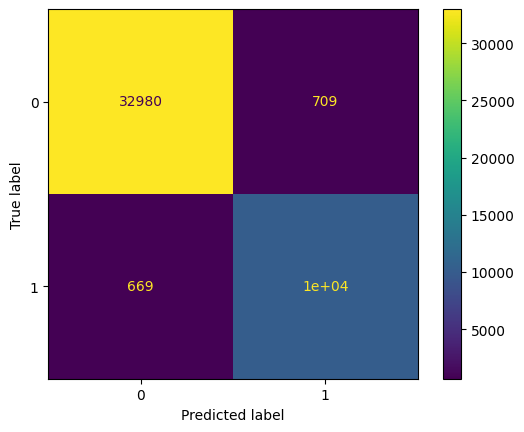

In [ ]:
confdisplay=ConfusionMatrixDisplay(conf)
confdisplay.plot()

In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9691031390134529


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

conf = confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)

print('Accuracy of RandomForest: ',acc)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy of RandomForest:  0.9779596412556054
Confusion Matrix: 
 [[32862   827]
 [  156 10755]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     33689
           1       0.93      0.99      0.96     10911

    accuracy                           0.98     44600
   macro avg       0.96      0.98      0.97     44600
weighted avg       0.98      0.98      0.98     44600



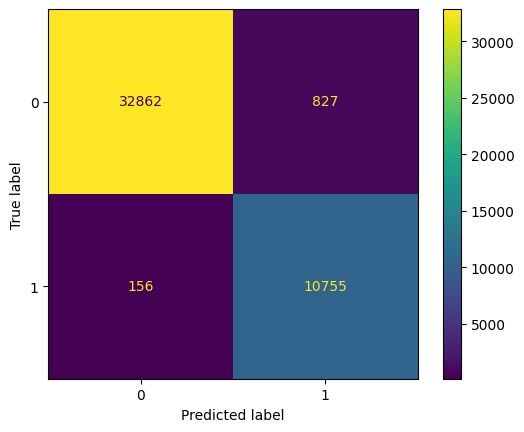

In [ ]:
# Confusion matrix of RandomForest
confdisplay=ConfusionMatrixDisplay(conf)
confdisplay.plot()

In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9779596412556054


In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

conf = confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)

print('Accuracy of Logistic Regression: ',acc)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))


Accuracy of Logistic Regression:  0.5469730941704036
Confusion Matrix: 
 [[20762 12927]
 [ 7278  3633]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.62      0.67     33689
           1       0.22      0.33      0.26     10911

    accuracy                           0.55     44600
   macro avg       0.48      0.47      0.47     44600
weighted avg       0.61      0.55      0.57     44600



c:\Users\kalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 0.4829903750414869
testing accuaracy: 0.5469730941704036


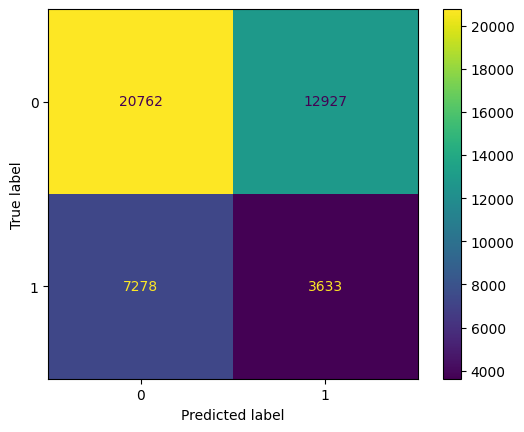

In [ ]:
confdisplay=ConfusionMatrixDisplay(conf)
confdisplay.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Prepare the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
knn_model.fit(x_train, y_train)

# Predict the responses for the test dataset
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
conf_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Display the results
print('Accuracy of K-Nearest Neighbors: ', acc_knn)
print(10 * '===========')
print('Confusion Matrix: \n', conf_knn)
print(10 * '===========')
print('Classification Report: \n', classification_report(y_test, y_pred_knn))


Accuracy of K-Nearest Neighbors:  0.7438340807174888
Confusion Matrix: 
 [[26787  6902]
 [ 4523  6388]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.82     33689
           1       0.48      0.59      0.53     10911

    accuracy                           0.74     44600
   macro avg       0.67      0.69      0.68     44600
weighted avg       0.76      0.74      0.75     44600



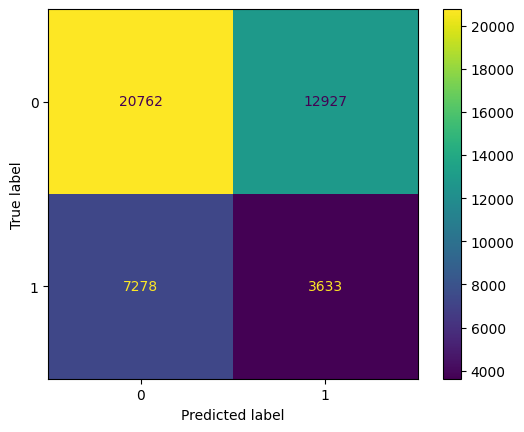

In [ ]:
confdisplay=ConfusionMatrixDisplay(conf)
confdisplay.plot()